# P43课本例3.1

In [29]:
import sys
data=[[5,1],[4,4]]
x=[1,1]

p=3 
#  p=1曼哈顿距离   p=2欧氏距离  .......
Lp_list=[]
for i in data:
    Lp=  (   (abs(i[0]-x[0]))**p + (abs(i[1]-x[1]))**p    )**(1/p)
    Lp_list.append(Lp)
xn=Lp_list.index(min(Lp_list))
print("P:",p,"与[1,1]最邻近点",data[xn])

#p=1或2时，[5,1]最邻近     p>=3时，[4,4]最邻近

P: 3 与[1,1]最邻近点 [4, 4]


## 第3章 k近邻法-习题

### 习题3.1
&emsp;&emsp;参照图3.1，在二维空间中给出实例点，画出$k$为1和2时的$k$近邻法构成的空间划分，并对其进行比较，体会$k$值选择与模型复杂度及预测准确率的关系。

**解答：**

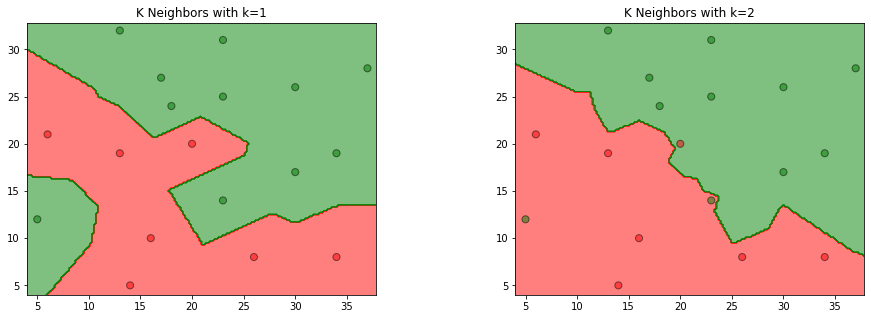

In [32]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0],
                 [13, 32,1], [17, 27,1], [18, 24,1], [20, 20, 0], [23, 14, 1],
                 [23, 25,1], [23, 31,1], [26, 8, 0], [30, 17, 1],
                 [30, 26,1], [34, 8, 0], [34, 19,1], [37, 28, 1]])
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
models = (clf.fit(X_train, y_train) for clf in models)

titles = ('K Neighbors with k=1', 'K Neighbors with k=2')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()

### 习题3.2
&emsp;&emsp;利用例题3.2构造的$kd$树求点$x=(3,4.5)^T$的最近邻点。

**解答：**

In [44]:
import sys
data=np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
x=[1,1]
p=2
#  p=1曼哈顿距离   p=2欧氏距离  .......
Lp_list=[]
for i in data:
    Lp=  (   (abs(i[0]-x[0]))**p + (abs(i[1]-x[1]))**p    )**(1/p)
    Lp_list.append(Lp)
xn=Lp_list.index(min(Lp_list))
print("P:",p,"与[1,1]最邻近点",data[xn])

#p=1或2时，[5,1]最邻近     p>=3时，[4,4]最邻近

P: 2 与[1,1]最邻近点 [2 3]


In [41]:
import numpy as np
from sklearn.neighbors import KDTree

train_data = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


### 习题3.3
&emsp;&emsp;参照算法3.3，写出输出为$x$的$k$近邻的算法。


**解答：**  
**算法：用kd树的$k$近邻搜索**  
输入：已构造的kd树；目标点$x$；    
输出：$x$的最近邻    
1. 在$kd$树中找出包含目标点$x$的叶结点：从根结点出发，递归地向下访问树。若目标点$x$当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右子结点，直到子结点为叶结点为止；  
2. 如果“当前$k$近邻点集”元素数量小于$k$或者叶节点距离小于“当前$k$近邻点集”中最远点距离，那么将叶节点插入“当前k近邻点集”；  
3. 递归地向上回退，在每个结点进行以下操作：  
(a)如果“当前$k$近邻点集”元素数量小于$k$或者当前节点距离小于“当前$k$近邻点集”中最远点距离，那么将该节点插入“当前$k$近邻点集”。  
(b)检查另一子结点对应的区域是否与以目标点为球心、以目标点与于“当前$k$近邻点集”中最远点间的距离为半径的超球体相交。如果相交，可能在另一个子结点对应的区域内存在距目标点更近的点，移动到另一个子结点，接着，递归地进行最近邻搜索；如果不相交，向上回退；
4. 当回退到根结点时，搜索结束，最后的“当前$k$近邻点集”即为$x$的最近邻点。

In [45]:
# 构建kd树，搜索待预测点所属区域
from collections import namedtuple
import numpy as np


# 建立节点类
class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return str(tuple(self))


# kd tree类
class KdTree():
    def __init__(self, k=1):
        self.k = k
        self.kdtree = None

    # 构建kd tree
    def _fit(self, X, depth=0):
        try:
            k = self.k
        except IndexError as e:
            return None
        # 这里可以展开，通过方差选择axis
        axis = depth % k
        X = X[X[:, axis].argsort()]
        median = X.shape[0] // 2
        try:
            X[median]
        except IndexError:
            return None
        return Node(location=X[median],
                    left_child=self._fit(X[:median], depth + 1),
                    right_child=self._fit(X[median + 1:], depth + 1))

    def _search(self, point, tree=None, depth=0, best=None):
        if tree is None:
            return best
        k = self.k
        # 更新 branch
        if point[0][depth % k] < tree.location[depth % k]:
            next_branch = tree.left_child
        else:
            next_branch = tree.right_child
        if not next_branch is None:
            best = next_branch.location
        return self._search(point,
                            tree=next_branch,
                            depth=depth + 1,
                            best=best)

    def fit(self, X):
        self.kdtree = self._fit(X)
        return self.kdtree

    def predict(self, X):
        res = self._search(X, self.kdtree)
        return res

KNN = KdTree()
X_train = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
KNN.fit(X_train)
X_new = np.array([[3, 4.5]])
res = KNN.predict(X_new)

x1 = res[0]
x2 = res[1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


# 实战  使用KNN算法处理简单分类任务

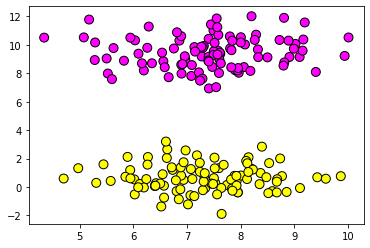

D:\ANnaconda\envs\HBHB\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


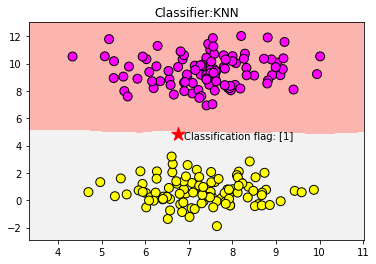

In [1]:
#二分类


# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为200，分类数为2的数据集
data=make_blobs(n_samples=200, n_features=2,centers=2, cluster_std=1.0, random_state=8)
X,Y=data
 
# 将生成的数据集进行可视化
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.show()
 
clf = KNeighborsClassifier()
clf.fit(X,Y)
 
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
plt.scatter(6.75,4.82,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[6.75,4.82]])
plt.text(6.9,4.5,'Classification flag: '+str(res))
 
plt.show()

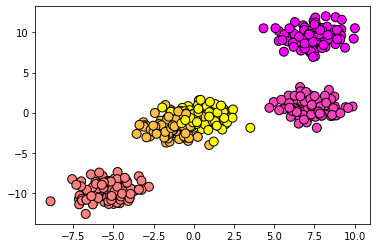

D:\ANnaconda\envs\HBHB\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


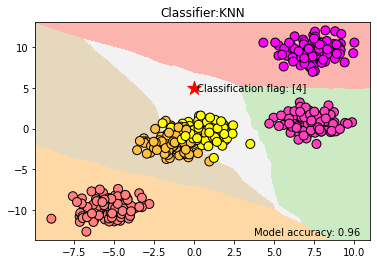

In [2]:
#五分类


# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为500，分类数为5的数据集
data=make_blobs(n_samples=500, n_features=2,centers=5, cluster_std=1.0, random_state=8)
X,Y=data
 
# 将生成的数据集进行可视化
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.show()
 
clf = KNeighborsClassifier()
clf.fit(X,Y)
 
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
plt.scatter(0,5,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[0,5]])
plt.text(0.2,4.6,'Classification flag: '+str(res))
plt.text(3.75,-13,'Model accuracy: {:.2f}'.format(clf.score(X, Y)))
 
plt.show()

#  KNN算法项目实战----酒的分类

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
 
# 从 sklearn的datasets模块载入数据集加载酒的数据集
wineDataSet=load_wine()
# print(wineDataSet)
print("红酒数据集中的键：\n{}".format(wineDataSet.keys()))
print("数据概况：\n{}".format(wineDataSet['data'].shape))
# print(wineDataSet['DESCR'])
 
# 将数据集拆分为训练数据集和测试数据集
X_train,X_test,y_train,y_test=train_test_split(wineDataSet['data'],wineDataSet['target'],random_state=0)
print("X_train shape:{}".format(X_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))
 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(knn)
 
# 评估模型的准确率
print('测试数据集得分：{:.2f}'.format(knn.score(X_test,y_test)))
 
# 使用建好的模型对新酒进行分类预测
X_new = np.array([[13.2,2.77,2.51,18.5,96.6,1.04,2.55,0.57,1.47,6.2,1.05,3.33,820]])
prediction = knn.predict(X_new)
print("预测新酒的分类为：{}".format(wineDataSet['target_names'][prediction]))

红酒数据集中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
数据概况：
(178, 13)
X_train shape:(133, 13)
X_test shape:(45, 13)
y_train shape:(133,)
y_test shape:(45,)
KNeighborsClassifier(n_neighbors=1)
测试数据集得分：0.76
预测新酒的分类为：['class_2']
